In [29]:
from keras.layers import Conv1D
from keras.layers import MaxPool1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Embedding
from keras.models import Sequential
import keras.metrics  
from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
max_features = 10000
max_len = 500

In [3]:
#loading data
print('loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

loading data...
25000 train sequences
25000 test sequences


In [4]:
#creating sequences
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [5]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPool1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
model.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics = [keras.metrics.binary_accuracy]);

W0821 05:19:15.966550  9864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 05:19:16.000548  9864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 05:19:16.009550  9864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 05:19:16.053550  9864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 05:19:16.094552  

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

W0821 05:19:16.378553  9864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 476us/step - loss: 0.8337 - binary_accuracy: 0.5088 - val_loss: 0.6875 - val_binary_accuracy: 0.5630
Epoch 2/10
20000/20000 [==============================] - 4s 194us/step - loss: 0.6700 - binary_accuracy: 0.6402 - val_loss: 0.6641 - val_binary_accuracy: 0.6584
Epoch 3/10
20000/20000 [==============================] - 4s 209us/step - loss: 0.6234 - binary_accuracy: 0.7547 - val_loss: 0.6076 - val_binary_accuracy: 0.7434
Epoch 4/10
20000/20000 [==============================] - 4s 196us/step - loss: 0.5256 - binary_accuracy: 0.8092 - val_loss: 0.4850 - val_binary_accuracy: 0.8084
Epoch 5/10
20000/20000 [==============================] - 4s 188us/step - loss: 0.4115 - binary_accuracy: 0.8473 - val_loss: 0.4283 - val_binary_accuracy: 0.8312
Epoch 6/10
20000/20000 [==============================] - 4s 187us/step - loss: 0.3491 - binary_accuracy: 0.8643 - val_loss: 0.4223 - val_bi

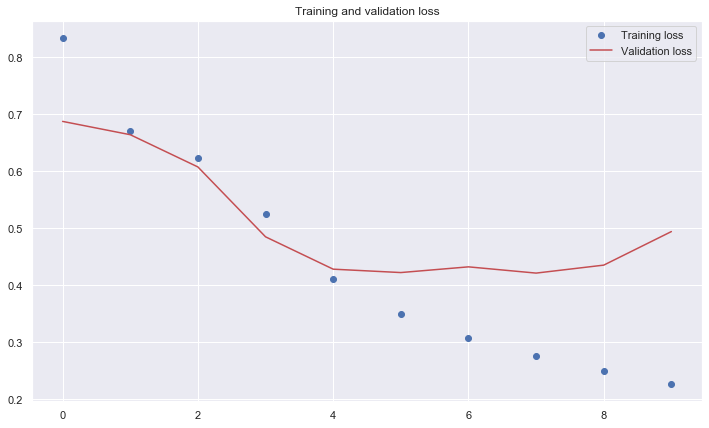

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(loss))

plt.figure(figsize=(12,7))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

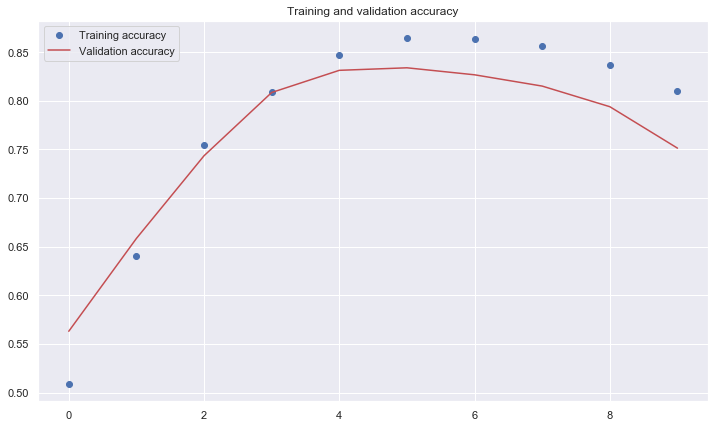

In [8]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

epochs = np.arange(len(loss))

plt.figure(figsize=(12,7))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend();

In [9]:
model_4 = Sequential()
model_4.add(Embedding(max_features, 128, input_length=max_len))
model_4.add(Conv1D(32, 7, activation='relu'))
model_4.add(MaxPool1D(5))
model_4.add(Conv1D(32, 7, activation='relu'))
model_4.add(GlobalMaxPooling1D())
model_4.add(Dense(1))
model_4.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics = [keras.metrics.binary_accuracy] );

In [10]:
history_4 = model_4.fit(x_train, y_train, epochs=4, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 4s 200us/step - loss: 0.7196 - binary_accuracy: 0.5169 - val_loss: 0.6874 - val_binary_accuracy: 0.5456
Epoch 2/4
20000/20000 [==============================] - 4s 184us/step - loss: 0.6692 - binary_accuracy: 0.6601 - val_loss: 0.6686 - val_binary_accuracy: 0.6640
Epoch 3/4
20000/20000 [==============================] - 4s 184us/step - loss: 0.6319 - binary_accuracy: 0.7624 - val_loss: 0.6272 - val_binary_accuracy: 0.7096
Epoch 4/4
20000/20000 [==============================] - 4s 185us/step - loss: 0.5554 - binary_accuracy: 0.8045 - val_loss: 0.5191 - val_binary_accuracy: 0.7896


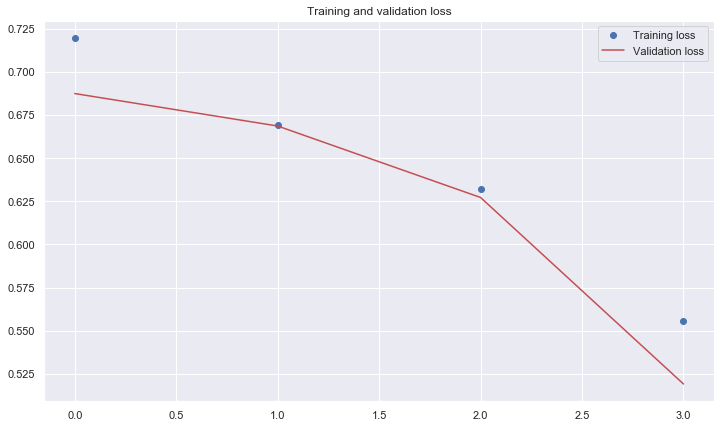

In [11]:
loss_4 = history_4.history['loss']
val_loss_4 = history_4.history['val_loss']

epochs_4 = np.arange(len(loss_4))

plt.figure(figsize=(12,7))

plt.plot(epochs_4, loss_4, 'bo', label='Training loss')
plt.plot(epochs_4, val_loss_4, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

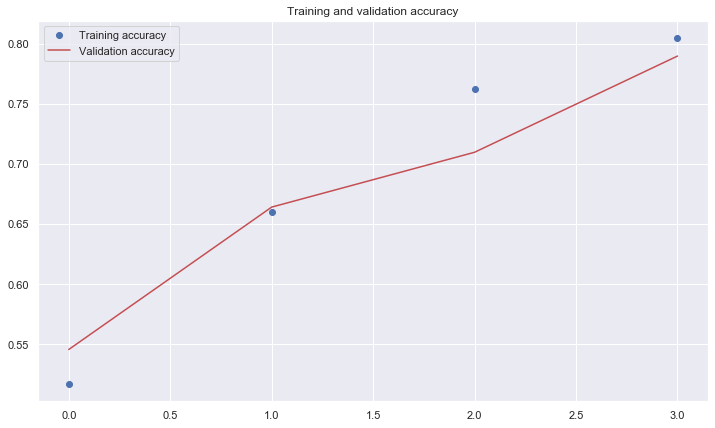

In [12]:
acc_4 = history_4.history['binary_accuracy']
val_acc_4 = history_4.history['val_binary_accuracy']

epochs_4 = np.arange(len(loss_4))

plt.figure(figsize=(12,7))

plt.plot(epochs_4, acc_4, 'bo', label='Training accuracy')
plt.plot(epochs_4, val_acc_4, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend();

In [13]:
filename = 'jena_climate_2009_2016.csv'
f = open(filename)
data = f.read()
f.close()

In [14]:
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [15]:
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [16]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets           

In [17]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)


val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size
#np.mean(np.abs(preds - targets))

In [18]:
model_jena = Sequential()
model_jena.add(Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model_jena.add(MaxPool1D(3))
model_jena.add(Conv1D(32, 5, activation='relu'))
model_jena.add(MaxPool1D(3))
model_jena.add(Conv1D(32, 5, activation='relu'))
model_jena.add(GlobalMaxPooling1D())
model_jena.add(Dense(1))
model_jena.compile(optimizer=RMSprop(), loss='mae')

In [19]:
history_j = model_jena.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 11s 21ms/step - loss: 9.2588 - val_loss: 4.4104
Epoch 2/20
500/500 [==============================] - 11s 21ms/step - loss: 4.4123 - val_loss: 3.8234
Epoch 3/20
500/500 [==============================] - 11s 22ms/step - loss: 4.2421 - val_loss: 3.8822
Epoch 4/20
500/500 [==============================] - 10s 21ms/step - loss: 4.1490 - val_loss: 3.7973
Epoch 5/20
500/500 [==============================] - 10s 21ms/step - loss: 3.9650 - val_loss: 4.2178
Epoch 6/20
500/500 [==============================] - 10s 21ms/step - loss: 3.8546 - val_loss: 3.9413
Epoch 7/20
500/500 [==============================] - 10s 21ms/step - loss: 3.7800 - val_loss: 4.3427
Epoch 8/20
500/500 [==============================] - 10s 21ms/step - loss: 3.6649 - val_loss: 4.0215
Epoch 9/20
500/500 [==============================] - 10s 21ms/step - loss: 3.6146 - val_loss: 3.8066
Epoch 10/20
500/500 [==============================] - 10s 21ms/step - loss: 3.510

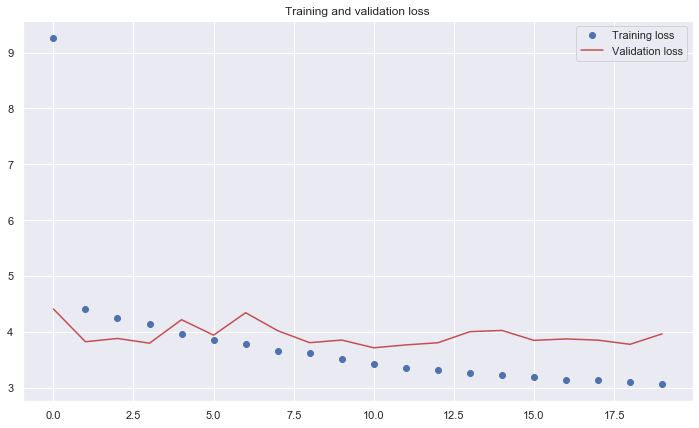

In [21]:
loss_j = history_j.history['loss']
val_loss_j = history_j.history['val_loss']

epochs_j = np.arange(len(loss_j))

plt.figure(figsize=(12,7))

plt.plot(epochs_j, loss_j, 'bo', label='Training loss')
plt.plot(epochs_j, val_loss_j, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [37]:
model_combined = Sequential()
model_combined.add(Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model_combined.add(MaxPool1D(3))
model_combined.add(Conv1D(32, 5, activation='relu'))
model_combined.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
model_combined.add(Dense(1))
model_combined.compile(optimizer=RMSprop(), loss='mae')
model_combined.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [38]:
history_combined = model_combined.fit_generator(train_gen,
                                               steps_per_epoch=500,
                                               epochs=20,
                                               validation_data=val_gen,
                                               validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 67s 134ms/step - loss: 7.5740 - val_loss: 6.7580
Epoch 2/20
500/500 [==============================] - 60s 120ms/step - loss: 6.0592 - val_loss: 3.9783
Epoch 3/20
500/500 [==============================] - 59s 119ms/step - loss: 4.2926 - val_loss: 3.5046
Epoch 4/20
500/500 [==============================] - 60s 119ms/step - loss: 3.8819 - val_loss: 3.9859
Epoch 5/20
500/500 [==============================] - 60s 119ms/step - loss: 3.5799 - val_loss: 3.2998
Epoch 6/20
500/500 [==============================] - 61s 121ms/step - loss: 3.3914 - val_loss: 3.2199
Epoch 7/20
500/500 [==============================] - 60s 120ms/step - loss: 3.3461 - val_loss: 2.9945
Epoch 8/20
500/500 [==============================] - 59s 118ms/step - loss: 3.3192 - val_loss: 3.3140
Epoch 9/20
500/500 [==============================] - 59s 117ms/step - loss: 3.2594 - val_loss: 3.5049
Epoch 10/20
500/500 [==============================] - 59s 117ms/step - l

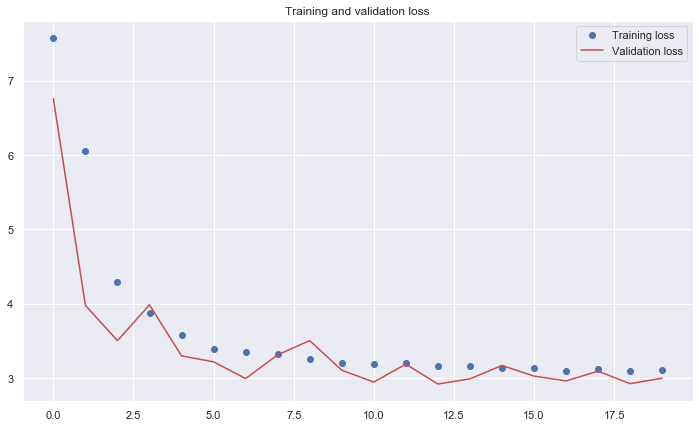

In [40]:
loss_с = history_combined.history['loss']
val_loss_с = history_combined.history['val_loss']

epochs_с = np.arange(len(loss_с))

plt.figure(figsize=(12,7))

plt.plot(epochs_с, loss_с, 'bo', label='Training loss')
plt.plot(epochs_с, val_loss_с, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();